<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_167/blob/main/Reto%20Entrega%202%20-%20Clasificaci%C3%B3n%20Ensambles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

16 Noviembre 2022






In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mplcursors import cursor 
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
import seaborn as sns
from matplotlib import rcParams

#import geopandas as gpd
#from  geopandas import GeoDataFrame
from shapely.geometry import Point
from sklearn import preprocessing, cluster

scaler = StandardScaler()
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [17]:
#df contiene nuestro dataframe original
df = pd.read_csv('/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=None ,encoding='utf-8',encoding_errors='ignore')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [18]:
df.describe(include='all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    CONTAMINANTES se debe de separar con un onehot encoding diferente, pues cada celda puede tener multiples valores

In [19]:
new_df = pd.concat([df.drop('CONTAMINANTES', 1), df['CONTAMINANTES'].str.get_dummies(sep=",")], 1)
pd.DataFrame(new_df)
new_df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


    Separando training-validation and test datasets. 
    Removiendo variables con valores unicas (municipio) asi como columnas vacias (SDT_mg/L), etc.
    Se separa variable de salida.

In [20]:
y = new_df[['SEMAFORO']]
X = new_df.drop(columns=['CLAVE', 'PERIODO', 'SITIO','SDT_mg/L','MUNICIPIO','ACUIFERO'])

#Replacing all the "<" chars from all the columns, to make possible the numeric imputation
X.replace('\<', '', regex=True, inplace=True)

Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

    Creamos el pipeline para normalizar, e imputar datos faltantes

In [21]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(missing_values=np.nan, strategy= 'mean', fill_value = 0)),
                                 ('scale', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']



catOHE_pipeline =  Pipeline(steps= [('impute', SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=np.nan)),
                                    ('one-hot', OneHotEncoder(handle_unknown = 'ignore',drop='if_binary', sparse=False ))
                                    #('si2', SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=np.nan))
                                    ])      
#Dropping numeric and already "one,hot encoded" variables                                    
catOHE_pipeline_nombres = list(X.drop(columns=['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L',
'ALC',	'AS',	'CD',	'CF',	'CONDUC',	'CR',	'DT',	'FE',	'FLUO',	'HG',	'MN',	'NI',	'NO3',	'PB',	'SDT_ra',	'SDT_salin']))                                                          

#catOHE_pipeline_nombres                                                                                                                   

In [22]:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)
                                        ], remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor)])
clf.fit(Xtv)
categorcial_encoded_features = clf.named_steps['preprocessor'].transformers_[1][1].named_steps['one-hot'].get_feature_names(catOHE_pipeline_nombres)

XtrainvalTransf = preprocessor.fit_transform(Xtv)

XtrainvalTransf_asDataFrame = pd.DataFrame(XtrainvalTransf)

X_Transformed_Columns = []
X_Transformed_Columns.extend(num_pipeline_nombres)
X_Transformed_Columns.extend(categorcial_encoded_features)
#This are the passedtrough columns
X_Transformed_Columns.extend(['ALC','AS','CD','CF','CONDUC','CR','DT','FE','FLUO','HG','MN','NI','NO3','PB','SDT_ra','SDT_salin'])

XtrainvalTransf_asDataFrame.columns = X_Transformed_Columns

XtrainvalTransf_asDataFrame.head(5)



,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ORGANISMO_DE_CUENCA_AGUAS DEL VALLE DE MEXICO,ORGANISMO_DE_CUENCA_BALSAS,ORGANISMO_DE_CUENCA_CUENCAS CENTRALES DEL NORTE,ORGANISMO_DE_CUENCA_FRONTERA SUR,ORGANISMO_DE_CUENCA_GOLFO CENTRO,ORGANISMO_DE_CUENCA_GOLFO NORTE,ORGANISMO_DE_CUENCA_LERMA SANTIAGO PACIFICO,ORGANISMO_DE_CUENCA_NOROESTE,ORGANISMO_DE_CUENCA_PACIFICO NORTE,ORGANISMO_DE_CUENCA_PACIFICO SUR,ORGANISMO_DE_CUENCA_PENINSULA DE BAJA CALIFORNIA,ORGANISMO_DE_CUENCA_PENINSULA DE YUCATAN,ORGANISMO_DE_CUENCA_RIO BRAVO,ESTADO_AGUASCALIENTES,ESTADO_BAJA CALIFORNIA,ESTADO_BAJA CALIFORNIA SUR,ESTADO_CAMPECHE,ESTADO_CHIAPAS,ESTADO_CHIHUAHUA,ESTADO_COAHUILA DE ZARAGOZA,ESTADO_COLIMA,ESTADO_DISTRITO FEDERAL,ESTADO_DURANGO,ESTADO_GUANAJUATO,ESTADO_GUERRERO,ESTADO_HIDALGO,ESTADO_JALISCO,ESTADO_MEXICO,ESTADO_MICHOACAN DE OCAMPO,ESTADO_MORELOS,ESTADO_NAYARIT,ESTADO_NUEVO LEON,ESTADO_OAXACA,ESTADO_PUEBLA,ESTADO_QUERETARO ARTEAGA,ESTADO_QUINTANA ROO,ESTADO_SAN LUIS POTOSI,ESTADO_SINALOA,ESTADO_SONORA,ESTADO_TABASCO,ESTADO_TAMAULIPAS,ESTADO_TLAXCALA,ESTADO_VERACRUZ DE IGNACIO DE LA LLAVE,ESTADO_YUCATAN,ESTADO_ZACATECAS,SUBTIPO_BOMBEO CENOTE,SUBTIPO_CENOTE,SUBTIPO_DESCARGA,SUBTIPO_MANANTIAL,SUBTIPO_NORIA,SUBTIPO_POZO,SUBTIPO_POZO NORIA,SUBTIPO_Pozo,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,CALIDAD_ALC_Indeseable como FAAP,CALIDAD_ALC_Media,CALIDAD_CONDUC_Buena para riego,CALIDAD_CONDUC_Dudosa para riego,CALIDAD_CONDUC_Excelente para riego,CALIDAD_CONDUC_Indeseable para riego,CALIDAD_CONDUC_Permisible para riego,CALIDAD_SDT_ra_Cultivos con manejo especial,CALIDAD_SDT_ra_Cultivos sensibles,CALIDAD_SDT_ra_Cultivos tolerantes,CALIDAD_SDT_ra_Excelente para riego,CALIDAD_SDT_ra_Indeseable para riego,CALIDAD_SDT_salin_Ligeramente salobres,CALIDAD_SDT_salin_Potable - Dulce,CALIDAD_SDT_salin_Salinas,CALIDAD_SDT_salin_Salobres,CALIDAD_FLUO_Alta,CALIDAD_FLUO_Baja,CALIDAD_FLUO_Media,CALIDAD_FLUO_Potable - Optima,CALIDAD_DUR_Muy dura e indeseable usos industrial y domestico,CALIDAD_DUR_Potable - Dura,CALIDAD_DUR_Potable - Moderadamente suave,CALIDAD_DUR_Potable - Suave,CALIDAD_COLI_FEC_Aceptable,CALIDAD_COLI_FEC_Buena calidad,CALIDAD_COLI_FEC_Contaminada,CALIDAD_COLI_FEC_Fuertemente contaminada,CALIDAD_COLI_FEC_Potable - Excelente,CALIDAD_N_NO3_No apta como FAAP,CALIDAD_N_NO3_Potable - Buena calidad,CALIDAD_N_NO3_Potable - Excelente,CALIDAD_AS_Apta como FAAP,CALIDAD_AS_No apta como FAAP,CALIDAD_AS_Potable - Excelente,CALIDAD_CD_Potable - Excelente,CALIDAD_CR_Potable - Excelente,CALIDAD_HG_Potable - Excelente,CALIDAD_PB_Potable - Excelente,CALIDAD_MN_Potable - Excelente,CALIDAD_MN_Puede afectar la salud,CALIDAD_MN_Sin efectos en la salud - Puede dar color al agua,CALIDAD_FE_Sin efectos en la salud - Puede dar color al agua,SEMAFORO_Amarillo,SEMAFORO_Rojo,SEMAFORO_Verde,CUMPLE_CON_ALC_ND,CUMPLE_CON_ALC_NO,CUMPLE_CON_ALC_SI,CUMPLE_CON_COND_ND,CUMPLE_CON_COND_NO,CUMPLE_CON_COND_SI,CUMPLE_CON_SDT_ra_ND,CUMPLE_CON_SDT_ra_NO,CUMPLE_CON_SDT_ra_SI,CUMPLE_CON_SDT_salin_ND,CUMPLE_CON_SDT_salin_NO,CUMPLE_CON_SDT_salin_SI,CUMPLE_CON_FLUO_SI,CUMPLE_CON_DUR_ND,CUMPLE_CON_DUR_NO,CUMPLE_CON_DUR_SI,CUMPLE_CON_CF_SI,CUMPLE_CON_NO3_ND,CUMPLE_CON_NO3_NO,CUMPLE_CON_NO3_SI,CUMPLE_CON_AS_SI,CUMPLE_CON_CD_SI,CUMPLE_CON_CR_SI,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_SI,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,1.618760,1.253717,1.034102,1.024383,1.003323,1.000000,1.030601,1.000000,1.047451,1.000000,1.0,1.003059,1.00000,1.0,1.000000,1.000097,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0

In [23]:
#En caso de querer ver el dataframe en excel
#XtrainvalTransf_asDataFrame.to_excel("test.xlsx")

    El siguiente pareto de histogramas de datos cateogoricos, nos ayudara a saber si podemos agrupar algunos de ellos, esto con el fin de reducir la cantidad de variables de entrada de nuestro modelo. Aqui observamos que SITIO, MUNICIPIO y ACUIFERO tienen datos unicos, es decir son irrelevantes para el modelo (pues tienen alta variabilidad)

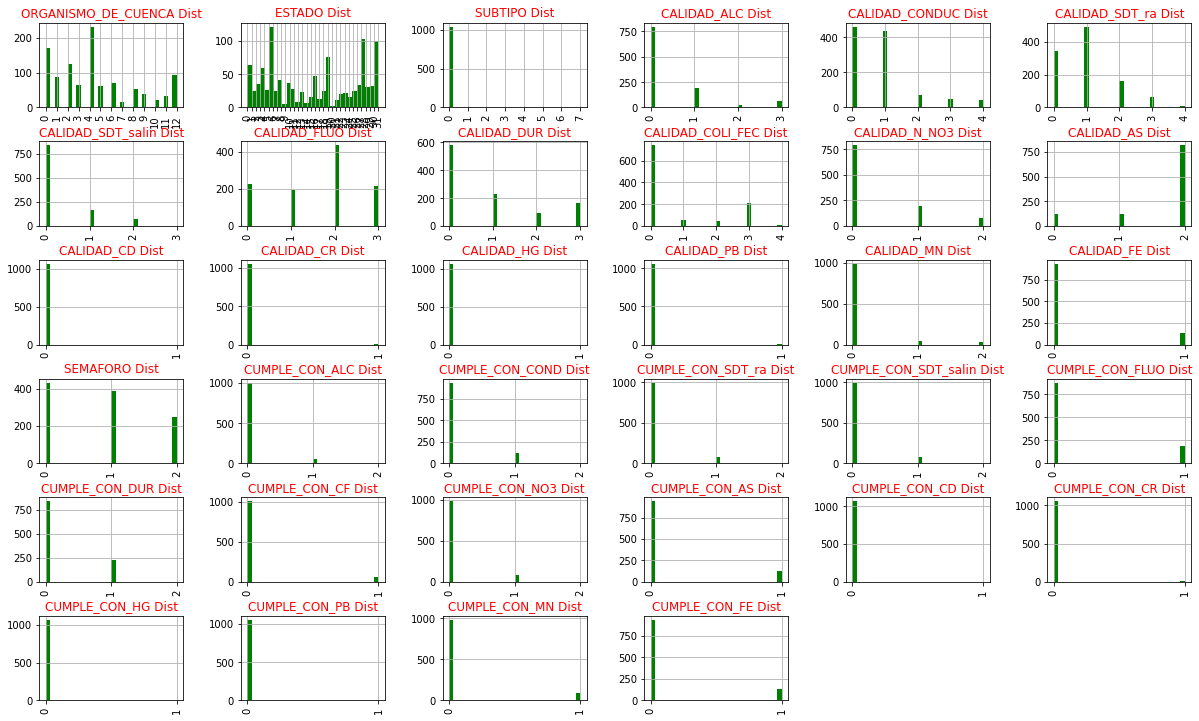

In [24]:
# Checking categorical variables distribution
fig=plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
for i, feature in enumerate(catOHE_pipeline_nombres):
    ax=fig.add_subplot(10,6,i+1)
    X[feature].hist(bins=30,ax=ax,facecolor='green')
    ax.set_title(feature+" Dist",color='red')
    #ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    ax.set_xticklabels(ax.get_xticks(), rotation=90)

fig.tight_layout(pad=50.0)  
plt.show();

In [25]:
XtrainvalTransf_asDataFrame.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ORGANISMO_DE_CUENCA_AGUAS DEL VALLE DE MEXICO,ORGANISMO_DE_CUENCA_BALSAS,ORGANISMO_DE_CUENCA_CUENCAS CENTRALES DEL NORTE,ORGANISMO_DE_CUENCA_FRONTERA SUR,ORGANISMO_DE_CUENCA_GOLFO CENTRO,ORGANISMO_DE_CUENCA_GOLFO NORTE,ORGANISMO_DE_CUENCA_LERMA SANTIAGO PACIFICO,ORGANISMO_DE_CUENCA_NOROESTE,ORGANISMO_DE_CUENCA_PACIFICO NORTE,ORGANISMO_DE_CUENCA_PACIFICO SUR,ORGANISMO_DE_CUENCA_PENINSULA DE BAJA CALIFORNIA,ORGANISMO_DE_CUENCA_PENINSULA DE YUCATAN,ORGANISMO_DE_CUENCA_RIO BRAVO,ESTADO_AGUASCALIENTES,ESTADO_BAJA CALIFORNIA,ESTADO_BAJA CALIFORNIA SUR,ESTADO_CAMPECHE,ESTADO_CHIAPAS,ESTADO_CHIHUAHUA,ESTADO_COAHUILA DE ZARAGOZA,ESTADO_COLIMA,ESTADO_DISTRITO FEDERAL,ESTADO_DURANGO,ESTADO_GUANAJUATO,ESTADO_GUERRERO,ESTADO_HIDALGO,ESTADO_JALISCO,ESTADO_MEXICO,ESTADO_MICHOACAN DE OCAMPO,ESTADO_MORELOS,ESTADO_NAYARIT,ESTADO_NUEVO LEON,ESTADO_OAXACA,ESTADO_PUEBLA,ESTADO_QUERETARO ARTEAGA,ESTADO_QUINTANA ROO,ESTADO_SAN LUIS POTOSI,ESTADO_SINALOA,ESTADO_SONORA,ESTADO_TABASCO,ESTADO_TAMAULIPAS,ESTADO_TLAXCALA,ESTADO_VERACRUZ DE IGNACIO DE LA LLAVE,ESTADO_YUCATAN,ESTADO_ZACATECAS,SUBTIPO_BOMBEO CENOTE,SUBTIPO_CENOTE,SUBTIPO_DESCARGA,SUBTIPO_MANANTIAL,SUBTIPO_NORIA,SUBTIPO_POZO,SUBTIPO_POZO NORIA,SUBTIPO_Pozo,CALIDAD_ALC_Alta,CALIDAD_ALC_Baja,CALIDAD_ALC_Indeseable como FAAP,CALIDAD_ALC_Media,CALIDAD_CONDUC_Buena para riego,CALIDAD_CONDUC_Dudosa para riego,CALIDAD_CONDUC_Excelente para riego,CALIDAD_CONDUC_Indeseable para riego,CALIDAD_CONDUC_Permisible para riego,CALIDAD_SDT_ra_Cultivos con manejo especial,CALIDAD_SDT_ra_Cultivos sensibles,CALIDAD_SDT_ra_Cultivos tolerantes,CALIDAD_SDT_ra_Excelente para riego,CALIDAD_SDT_ra_Indeseable para riego,CALIDAD_SDT_salin_Ligeramente salobres,CALIDAD_SDT_salin_Potable - Dulce,CALIDAD_SDT_salin_Salinas,CALIDAD_SDT_salin_Salobres,CALIDAD_FLUO_Alta,CALIDAD_FLUO_Baja,CALIDAD_FLUO_Media,CALIDAD_FLUO_Potable - Optima,CALIDAD_DUR_Muy dura e indeseable usos industrial y domestico,CALIDAD_DUR_Potable - Dura,CALIDAD_DUR_Potable - Moderadamente suave,CALIDAD_DUR_Potable - Suave,CALIDAD_COLI_FEC_Aceptable,CALIDAD_COLI_FEC_Buena calidad,CALIDAD_COLI_FEC_Contaminada,CALIDAD_COLI_FEC_Fuertemente contaminada,CALIDAD_COLI_FEC_Potable - Excelente,CALIDAD_N_NO3_No apta como FAAP,CALIDAD_N_NO3_Potable - Buena calidad,CALIDAD_N_NO3_Potable - Excelente,CALIDAD_AS_Apta como FAAP,CALIDAD_AS_No apta como FAAP,CALIDAD_AS_Potable - Excelente,CALIDAD_CD_Potable - Excelente,CALIDAD_CR_Potable - Excelente,CALIDAD_HG_Potable - Excelente,CALIDAD_PB_Potable - Excelente,CALIDAD_MN_Potable - Excelente,CALIDAD_MN_Puede afectar la salud,CALIDAD_MN_Sin efectos en la salud - Puede dar color al agua,CALIDAD_FE_Sin efectos en la salud - Puede dar color al agua,SEMAFORO_Amarillo,SEMAFORO_Rojo,SEMAFORO_Verde,CUMPLE_CON_ALC_ND,CUMPLE_CON_ALC_NO,CUMPLE_CON_ALC_SI,CUMPLE_CON_COND_ND,CUMPLE_CON_COND_NO,CUMPLE_CON_COND_SI,CUMPLE_CON_SDT_ra_ND,CUMPLE_CON_SDT_ra_NO,CUMPLE_CON_SDT_ra_SI,CUMPLE_CON_SDT_salin_ND,CUMPLE_CON_SDT_salin_NO,CUMPLE_CON_SDT_salin_SI,CUMPLE_CON_FLUO_SI,CUMPLE_CON_DUR_ND,CUMPLE_CON_DUR_NO,CUMPLE_CON_DUR_SI,CUMPLE_CON_CF_SI,CUMPLE_CON_NO3_ND,CUMPLE_CON_NO3_NO,CUMPLE_CON_NO3_SI,CUMPLE_CON_AS_SI,CUMPLE_CON_CD_SI,CUMPLE_CON_CR_SI,CUMPLE_CON_HG_SI,CUMPLE_CON_PB_SI,CUMPLE_CON_MN_SI,CUMPLE_CON_FE_SI,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.

    Verificando que no existan datos nulos en nuestro dataset completo, es decir que nuestro pipeline funciona correctamente

In [26]:
XtrainvalTransf_asDataFrame.isnull().values.any()

False

Converting all "objects" (after column transformation) to numbers, de otra forma, el grafico de Heatmap entra en fallo.

In [27]:
XtrainvalTransf_asDataFrame = XtrainvalTransf_asDataFrame.apply(pd.to_numeric, errors='coerce')


    Verificamos cuartiles y outliers de nuestros datos cuantitativos

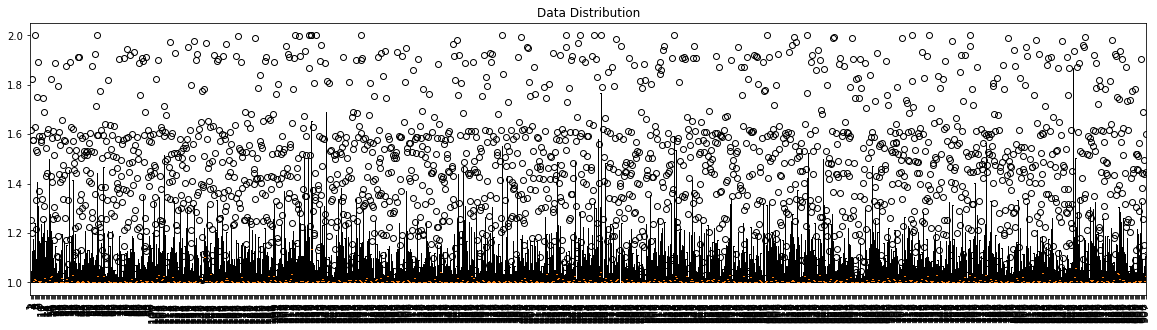

In [28]:
plt.figure(figsize= (20, 5))
#plt.boxplot(XtrainvalTransf_asDataFrame[num_pipeline_nombres], labels=num_pipeline_nombres)
plt.boxplot(XtrainvalTransf_asDataFrame[num_pipeline_nombres])
plt.title("Data Distribution")
plt.xticks(rotation = 90, fontsize=11);
plt.show()

    Buscando correlacion DIRECTA entre la calidad del agua (Semaforo) y su ubicacion geografica.

In [29]:
Bad_water_dataset = XtrainvalTransf_asDataFrame[['LONGITUD','LATITUD','SEMAFORO_Amarillo', 'SEMAFORO_Rojo', 'SEMAFORO_Verde']]

    Verificamos cuartiles y outliers de nuestros datos quantitativos

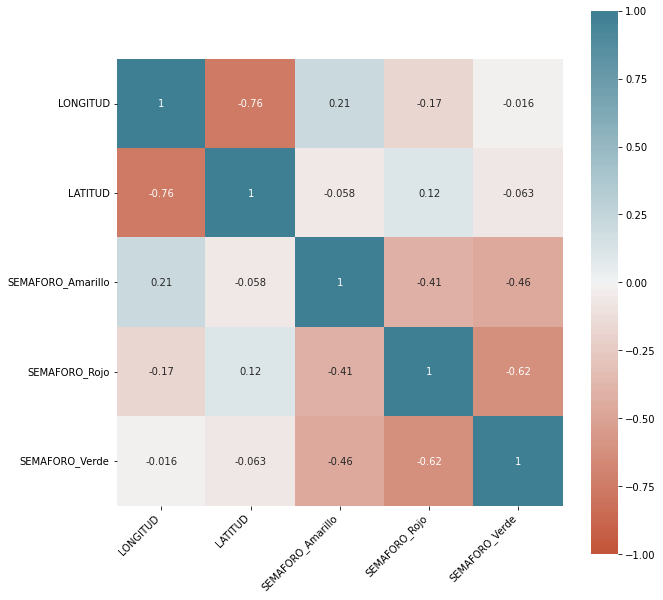

In [30]:
corr = Bad_water_dataset.corr()

fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(
    corr, annot=True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
sns.set(font_scale=2.0) 
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

    No se observa una correlacion directa entre el color del semaforo, ni contra la latitud ni longitud.

    Debido a que gtenemos muchos features de entrada, conviene hacer PCA para reducirlos antes de buscar Kmeans

In [31]:
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(XtrainvalTransf_asDataFrame)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df = pcsSummary_df.round(4)
pd.set_option('display.max_columns', None)
pcsSummary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160
Standard deviation,1.2710,0.9868,0.8559,0.7222,0.7112,0.6395,0.6038,0.5882,0.5647,0.5342,0.5305,0.5157,0.4914,0.4796,0.4537,0.4462,0.4227,0.4101,0.4015,0.3942,0.3653,0.3619,0.3421,0.3279,0.3208,0.3059,0.2992,0.2859,0.2782,0.2708,0.2637,0.2481,0.2450,0.2396,0.2353,0.2219,0.2109,0.2042,0.1960,0.1955,0.1899,0.1866,0.1802,0.1740,0.1691,0.1659,0.1608,0.1571,0.1499,0.1472,0.1395,0.1378,0.1353,0.1308,0.1289,0.1251,0.1229,0.1198,0.1167,0.1133,0.1120,0.1053,0.1012,0.0984,0.0873,0.0847,0.0812,0.0798,0.0763,0.0758,0.0738,0.0661,0.0638,0.0622,0.0606,0.0585,0.0574,0.0541,0.0528,0.0518,0.0477,0.0437,0.0427,0.0426,0.0416,0.0406,0.0385,0.0371,0.0364,0.0326,0.0321,0.0316,0.0307,0.0281,0.0268,0.0237,0.0222,0.0205,0.0193,0.0191,0.0152,0.0125,0.01,0.0038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Proportion of variance,0.1572,0.0948,0.0713,0.0508,0.0492,0.0398,0.0355,0.0337,0.0310,0.0278,0.0274,0.0259,0.0235,0.0224,0.0200,0.0194,0.0174,0.0164,0.0157,0.0151,0.0130,0.0127,0.0114,0.0105,0.0100,0.0091,0.0087,0.0080,0.0075,0.0071,0.0068,0.0060,0.0058,0.0056,0.0054,0.0048,0.0043,0.0041,0.0037,0.0037,0.0035,0.0034,0.0032,0.0029,0.0028,0.0027,0.0025,0.0024,0.0022,0.0021,0.0019,0.0018,0.0018,0.0017,0.0016,0.0015,0.0015,0.0014,0.0013,0.0012,0.0012,0.0011,0.0010,0.0009,0.0007,0.0007,0.0006,0.0006,0.0006,0.0006,0.0005,0.0004,0.0004,0.0004,0.0004,0.0003,0.0003,0.0003,0.0003,0.0003,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cumulative proportion,0.1572,0.2520,0.3233,0.3741,0.4233,0.4632,0.4986,0.5323,0.5634,0.5911,0.6185,0.6444,0.6679,0.6903,0.7104,0.7297,0.7471,0.7635,0.7792,0.7943,0.8073,0.8201,0.8314,0.8419,0.8519,0.8610,0.8698,0.8777,0.8852,0.8924,0.8992,0.9052,0.9110,0.9166,0.9220,0.9268,0.9311,0.9352,0.9389,0.9426,0.9461,0.9495,0.9527,0.9556,0.9584,0.9611,0.9636,0.9660,0.9682,0.9703,0.9722,0.9740,0.9758,0.9775,0.9791,0.9806,0.9821,0.9835,0.9848,0.9861,0.9873,0.9884,0.9894,0.9903,0.9911,0.9918,0.9924,0.9930,0.9936,0.9941,0.9947,0.9951,0.9955,0.9959,0.9962,0.9966,0.9969,0.9972,0.9974,0.9977,0.9979,0.9981,0.9983,0.9985,0.9986,0.9988,0.9989,0.9991,0.9992,0.9993,0.9994,0.9995,0.9996,0.9997,0.9997,0.9998,0.9998,0.9999,0.9999,1.0000,1.0000,1.0000,1.00,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Aqui observamos que 32 componentes explican mas del 90% de la varianza

    Ahora buscaremos los Kmeans utilizando el dataset de PCA

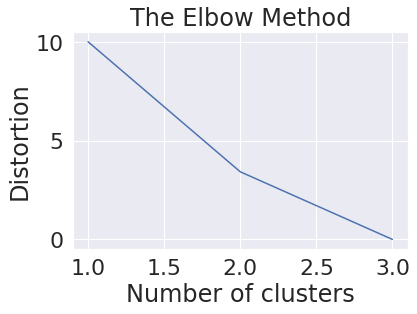

In [32]:
#tu codigo aquí

#Buscando clusters con todas las variables convertidas a PCA (solo las primeras 32)
X = pcsSummary_df.iloc[: , :32].copy()
max_k = 100## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=5000, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
#ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
#ax.legend()
ax.grid(True)
plt.show();

3 son los clusters que se observan mediante el metodo del codo

In [33]:
latlong = df[['LATITUD','LONGITUD']]

In [34]:
#Busquemos cuales son los centroides de los clusters, esto sera el centroide de las relaciones encontradas entre latitud, longitud y los semaforos
k = 3

model = cluster.KMeans(n_clusters=k, init='k-means++')
X = latlong.copy() # Cluster
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X) ## Buscar los centroidees (Distancia mas corta a todas las tiendas a su alrededor)
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, dtf_X.drop("cluster", axis=1).values)
dtf_X["centroide"] = 0
for i in closest:
    dtf_X["centroide"].iloc[i] = 1
df[["cluster","centroide"]] = dtf_X[["cluster","centroide"]]

df.sample(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,cluster,centroide
961,OCPSU4865,POZO No. 47 Codipsa 28 MAGDALENA ZAHUATLAN,PACIFICO SUR,OAXACA,MAGDALENA ZAHUATLAN,NOCHIXTLAN,POZO,-97.243556,17.393722,2020,289.000,Alta,651.0,Buena para riego,NaN,389,Excelente para riego,Potable - Dulce,3.963,Alta,316,Potable - Dura,<1.1,Potable - Excelente,0.263,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,0.08853,No apta como FAAP,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.01869,Potable - Excelente,0.94292,Sin efectos en la salud - Puede dar color al agua,Rojo,"FLUO,CR,FE,",SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,NO,SI,SI,SI,NO,0,0
809,OCNOR4015,EL VAPOR,NOROESTE,SONORA,CARBO,RIO ZANJON,POZO,-110.935170,29.653650,2020,258.330,Alta,650.0,Buena para riego,NaN,399,Excelente para riego,Potable - Dulce,0.3346,Baja,172.6254,Potable - Dura,<1.1,Potable - Excelente,3.505457,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,2,0
1011,OCPYU6392,CUZAMA,PENINSULA DE YUCATAN,YUCATAN,CUZAMA,PENINSULA DE YUCATAN,POZO,-89.317067,20.741298,2020,283.640,Alta,975.0,Permisible para riego,NaN,669,Cultivos sensibles,Potable - Dulce,0.3674,Baja,349.33,Potable - Dura,<1.1,Potable - Excelente,2.5313,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.00693,Potable - Excelente,0.19315,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,1,0
790,OCLSP3983,POZO SEAPAL 9,LERMA SANTIAGO PACIFICO,JALISCO,PUERTO VALLARTA,PUERTO VALLARTA,POZO,-105.212110,20.642820,2020,60.775,Baja,181.7,Excelente para riego,NaN,151.6,Excelente para riego,Potable - Dulce,0.6747,Media,45.6366,Potable - Suave,10,Buena calidad,0.649018,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0261,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0
678,OCCCN5262M1,POZO CNA 4840,CUENCAS CENTRALES DEL NORTE,DURANGO,GOMEZ PALACIO,PRINCIPAL-REGION LAGUNERA,POZO,-103.412130,25.812510,2020,97.010,Media,713.0,Buena para riego,NaN,433,Excelente para riego,Potable - Dulce,1.5267,Alta,111.1152,Potable - Moderadamente suave,<1.1,Potable - Excelente,3.215196,Potable - Excelente,0.0851,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,0


In [35]:
df.to_excel("clsuters.xlsx")

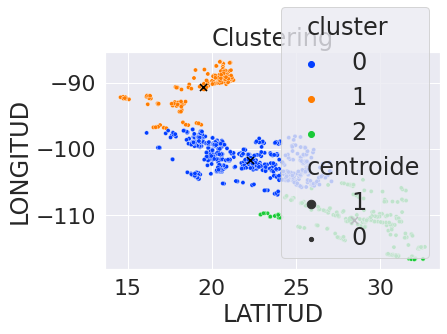

In [36]:
# Las X muestran los centroides (expresado en altitud y longitud)
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 20,20
sns.scatterplot(x="LATITUD", y="LONGITUD", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroide", size_order=[1,0], ax=ax).set_title('Clustering')
                
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', marker="x");

In [37]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
#Dataframe now has the Coordinates columns as a point, neccessary for map plotting
#df.head()

In [38]:
#Para graficarlos en un mapa segun el cluster de "calidad del agua"

water_sectors = gpd.GeoDataFrame(df, geometry="Coordinates")
water_sectors.head()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

color_mapping = {0.0: "red", 1.0: "yellow", 2.0: "green", 3.0: "blue",4.0: "brown",5.0: "pink"}
water_sectors.plot(ax=gax, alpha = 0.5, c=water_sectors["cluster"].map(color_mapping))

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua por region')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
plt.axis('off')

# Label the dots
#for x, y, cluster_ in zip(water_sectors['Coordinates'].x, water_sectors['Coordinates'].y, water_sectors['CALIDAD_MN']):
#    gax.annotate(cluster_, xy=(x,y), xytext=(2,2), textcoords='offset points')
#cursor(hover=True)
plt.show()



NameError: ignored

In [ ]:
#Para graficarlos en un mapa segun el color del semaforo

water_sectors = gpd.GeoDataFrame(df, geometry="Coordinates")
water_sectors.head()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

color_mapping = {'Rojo': "red", 'Amarillo': "yellow", 'Verde': "green", 3.0: "yellow",4.0: "orange",5.0: "red"}
water_sectors.plot(ax=gax, alpha = 0.5, c=water_sectors["SEMAFORO"].map(color_mapping))

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Semaforos')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
plt.axis('off')

# Label the dots
#for x, y, cluster_ in zip(water_sectors['Coordinates'].x, water_sectors['Coordinates'].y, water_sectors['CALIDAD_MN']):
#    gax.annotate(cluster_, xy=(x,y), xytext=(2,2), textcoords='offset points')
#cursor(hover=True)
plt.show()



# **Reto #2 -> Clasificación-ensambles y presentación ejecutiva.**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mplcursors import cursor 
import scipy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score
import seaborn as sns
from matplotlib import rcParams

#import geopandas as gpd
#from  geopandas import GeoDataFrame
from shapely.geometry import Point
from sklearn import preprocessing, cluster

scaler = StandardScaler()
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [8]:
df_reto2 = pd.read_csv('/content/sample_data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=None ,encoding='utf-8',encoding_errors='ignore')
df_reto2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


**Limpieza de base de datos**

1. Buscamos la proporción de la variable objetivo semáforo

In [9]:
df_reto2["SEMAFORO"].value_counts()/len(df_reto2)

Verde       0.406367
Rojo        0.362360
Amarillo    0.231273
Name: SEMAFORO, dtype: float64

2. Eliminamos el signo < de todas las variables ordinales

In [10]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  df_reto2[i] = df_reto2[i].astype("str")
  df_reto2[i] = df_reto2[i].str.replace("<","0")
  df_reto2[i]= df_reto2[i].astype("float")

3. Verificamos los datos vacíos que tiene nuestro dataframe

In [11]:
df_reto2.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

4. Ubicamos los diferentes valores que cada columna contiene. 
Luego tratamos los datos nulos por columna y agregamos el nombre de la columna con las listas "fill_moda" o "fill_mediana".

In [12]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

In [13]:
for c in fill_moda:
  df_reto2[c].fillna(df_reto2[c].mode()[0], inplace=True)

In [14]:
for c in fill_mediana:
  df_reto2[c].fillna(df_reto2[c].median(), inplace=True)

In [15]:
len(df_reto2)

1068

5. Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [16]:
df_reto2.drop("SDT_mg/L",axis=1,inplace=True)

6. Nos aseguramos que no haya valores nulos

In [17]:
df_reto2.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

7. Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [18]:
df_reto2["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [19]:
df_tmp = df_reto2["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfreto2 = pd.concat([df_reto2,df_tmp], axis=1)
clean_dfreto2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


8. Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [20]:
clean_dfreto2.drop("CONTAMINANTES",axis=1,inplace=True)

In [21]:
df_h2o_s = clean_dfreto2.copy()

In [22]:
df_h2o_s.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


9. Seleccionamos los atributos independientes con los que vamos a trabajar

In [23]:
columns=["SITIO","ORGANISMO_DE_CUENCA","ESTADO","MUNICIPIO","ACUIFERO","SUBTIPO","LONGITUD","LATITUD","CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE","ALC","AS","CD","CF",
         "CONDUC",	"CR"	,"DT","FE","FLUO","HG","MN","NI","NO3","PB","SDT_ra","SDT_salin","SEMAFORO"]

10. Creamos nuestro nuevo dataframe con las columnas deseadas

In [24]:
df_h2o_s=df_h2o_s[columns]

**Selecciona tus variables independientes X y dependiente Y (semáforo)**

1. Seleccionamos unas variable predictoras y objetivos

In [25]:
X=df_h2o_s.iloc[:,:-1:] #variables predictoras
y=df_h2o_s.iloc[:,-1] #variable objetivo

2. Creamos nuestro pipeline, usaremos en este caso variables categóricas y binarias, dado que son los 2 tipos de variables presentes en el dataset a utilizar para generar el modelo.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

#Usaremos onehotencoder para transformar las variables categóricas y las columnas que son binarias, pero quedaron expresadas con si y no.

categorical_features =["SITIO","ORGANISMO_DE_CUENCA"	,"ESTADO",	"MUNICIPIO","ACUIFERO",	"SUBTIPO"]
categorical_pipeline=Pipeline(
    steps=[("OHEcat",OneHotEncoder(handle_unknown="ignore"))]
)

binary_features=["CUMPLE_CON_ALC"	,
         "CUMPLE_CON_COND",	"CUMPLE_CON_SDT_ra"	,"CUMPLE_CON_SDT_salin","CUMPLE_CON_FLUO","CUMPLE_CON_DUR","CUMPLE_CON_CF","CUMPLE_CON_NO3",	
         "CUMPLE_CON_AS"	,"CUMPLE_CON_CD","CUMPLE_CON_CR",	"CUMPLE_CON_HG","CUMPLE_CON_PB","CUMPLE_CON_MN","CUMPLE_CON_FE"]
binary_pipeline=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)       

columnasTransformer = ColumnTransformer(transformers = [('catpipe', categorical_pipeline, categorical_features),
                                                        ('binpipe', binary_pipeline, binary_features)])

**Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]**

In [27]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder() #creamos el labelencoder
le.fit(y) #entrenamos nuestra salida
y_label=le.transform(y) #transformamos la salida

**Realiza un análisis general de las features importances a traves de decision trees o random forest.**

1. Para efectos de nuestro equipo seleccionamos el Decision Tree

In [28]:
#importamos el módulo tree que cuenta con el decision tree classifier
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
pipeline = Pipeline(steps=[('ct',columnasTransformer),('dt',decision_tree)])
pipeline.fit(X,y_label)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('catpipe',
                                                  Pipeline(steps=[('OHEcat',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SITIO',
                                                   'ORGANISMO_DE_CUENCA',
                                                   'ESTADO', 'MUNICIPIO',
                                                   'ACUIFERO', 'SUBTIPO']),
                                                 ('binpipe',
                                                  Pipeline(steps=[('OHEbi',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                                   'CUMPLE_

Feature: SITIO               , Score: 0.00094
Feature: ORGANISMO_DE_CUENCA , Score: 0.00122
Feature: ESTADO              , Score: 0.00000
Feature: MUNICIPIO           , Score: 0.00000
Feature: ACUIFERO            , Score: 0.00253
Feature: SUBTIPO             , Score: 0.00000
Feature: LONGITUD            , Score: 0.00000
Feature: LATITUD             , Score: 0.00000
Feature: CUMPLE_CON_ALC      , Score: 0.02903
Feature: CUMPLE_CON_COND     , Score: 0.05974
Feature: CUMPLE_CON_SDT_ra   , Score: 0.00000
Feature: CUMPLE_CON_SDT_salin, Score: 0.00000
Feature: CUMPLE_CON_FLUO     , Score: 0.20103
Feature: CUMPLE_CON_DUR      , Score: 0.14288
Feature: CUMPLE_CON_CF       , Score: 0.08155
Feature: CUMPLE_CON_NO3      , Score: 0.10459
Feature: CUMPLE_CON_AS       , Score: 0.11910
Feature: CUMPLE_CON_CD       , Score: 0.00103
Feature: CUMPLE_CON_CR       , Score: 0.01957
Feature: CUMPLE_CON_HG       , Score: 0.00000
Feature: CUMPLE_CON_PB       , Score: 0.01170
Feature: CUMPLE_CON_MN       , Sco

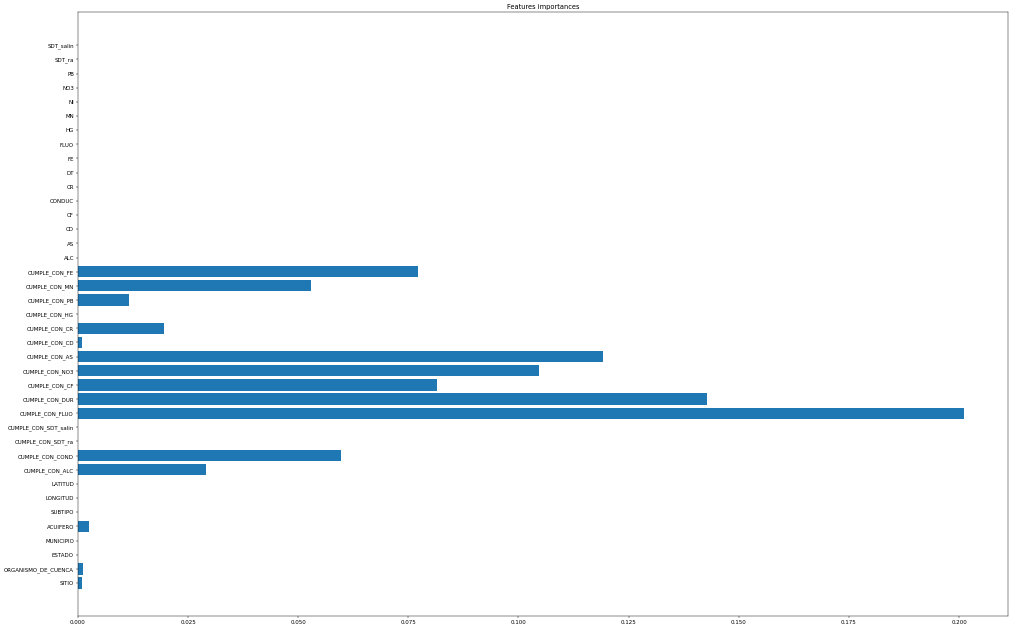

In [29]:
#Importamos el módulo para obtener las features más importantes, por medio de permutation importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Usamos la función permutation importance
importance = permutation_importance(pipeline, X, y_label, n_repeats=10,random_state=1)

figure(figsize = (30, 20), dpi = 40)

#Le pasamos el promedio de la importancia de la feature, seguido del nombre de la feature
for v,n in zip(importance['importances_mean'], list(X.columns)):
	print('Feature: {0:20}, Score: {1:.5f}'.format(n,v))

#Graficamos el resultado
plt.title("Features importances")
plt.barh(X.columns.to_numpy(),importance["importances_mean"])
plt.show()

**Selecciona las variables de mayor importancia.**

1. Tal como se puede observar, las columnas que hablan de si el agua cumple o no con algún indicador, serán las más importantes al momento de generar nuestro modelo, es por eso que serán nuestras variables de mayor importancia.

In [30]:
most_important=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
df_h2o_s=df_h2o_s[most_important]

2. Creamos otro pipeline con las variables más importantes

In [31]:
binary_features=["CUMPLE_CON_FE","CUMPLE_CON_MN","CUMPLE_CON_PB","CUMPLE_CON_CR","CUMPLE_CON_AS","CUMPLE_CON_NO3",
                "CUMPLE_CON_CF","CUMPLE_CON_DUR","CUMPLE_CON_FLUO","CUMPLE_CON_COND","CUMPLE_CON_ALC"]
bin_pipe=Pipeline(
    steps=[("OHEbi", OneHotEncoder(handle_unknown="ignore"))]
)  

important_features = ColumnTransformer(transformers = [('binpipe', bin_pipe, binary_features)])

3. Asignamos a X las columnas más importantes, sacadas con feature importance, la y ya la tenemos en la parte de arriba, guardada dentro de la variable y_label.

In [32]:
X=df_h2o_s

In [33]:
X.head()

,CUMPLE_CON_FE,CUMPLE_CON_MN,CUMPLE_CON_PB,CUMPLE_CON_CR,CUMPLE_CON_AS,CUMPLE_CON_NO3,CUMPLE_CON_CF,CUMPLE_CON_DUR,CUMPLE_CON_FLUO,CUMPLE_CON_COND,CUMPLE_CON_ALC
0,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI
3,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI


**Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)**

1. Usaremos el 30% de los datos para prueba y el resto para entrenamiento

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y_label,test_size=0.3,random_state=1,stratify=y_label)

**Creamos una función donde guardamos los modelos de Decision Tree y Random Forest**

1. Creamos una función donde guardamos los modelos de Decision Tree y Random Forest

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_models(): #creamos una función donde guardamos el modelo
  modelos = list()
  nombres = list()

  # RF - Bosque Aleatorio
  modelos.append(RandomForestClassifier(random_state=0,max_depth=5))

  #DT - Decision Tree
  modelos.append(DecisionTreeClassifier(random_state=0,max_depth=5))

  return modelos

2. Guardamos dentro de la variable modelos, nuestros modelos creados con get_models()

In [36]:
modelos=get_models()

3. Evaluamos nuestro modelo con Random Forest

In [37]:
pipeline_rf = Pipeline(steps=[('ct',important_features),('m',modelos[0])])
pipeline_rf.fit(X_train,y_train)
yhat_rf=pipeline_rf.predict(X_test)

4. Obtenemos las métricas de accuracy, precision y recall del modelo

In [38]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

accuracy=accuracy_score(y_test,yhat_rf)
precision=precision_score(y_test, yhat_rf, average='macro')
recall=recall_score(y_test,yhat_rf,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.9345794392523364
La precision es de: 0.9295508274231677
El recall es de: 0.925305734795074


5. Evaluamos nuestro modelo con Decision Tree

In [39]:
pipeline_dt = Pipeline(steps=[('ct',important_features),('m',modelos[1])])
pipeline_dt.fit(X_train,y_train)
yhat_dt=pipeline_dt.predict(X_test)

6. Obtenemos las métricas de accuracy, precision y recall del modelo

In [40]:
accuracy=accuracy_score(y_test,yhat_dt)
precision=precision_score(y_test, yhat_dt, average='macro')
recall=recall_score(y_test,yhat_dt,average="macro")
print("El accuracy es de:",accuracy)
print("La precision es de:",precision)
print("El recall es de:",recall)

El accuracy es de: 0.8660436137071651
La precision es de: 0.8824217787632422
El recall es de: 0.8470798384591488


7. Visualizamos el Decision Tree

[Text(0.6071428571428571, 0.9166666666666666, 'X[17] <= 0.5\ngini = 0.65\nsamples = 747\nvalue = [173, 271, 303]'),
 Text(0.5357142857142857, 0.75, 'X[15] <= 0.5\ngini = 0.626\nsamples = 613\nvalue = [173, 137, 303]'),
 Text(0.35714285714285715, 0.5833333333333334, 'X[0] <= 0.5\ngini = 0.514\nsamples = 466\nvalue = [65, 98, 303]'),
 Text(0.21428571428571427, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.42\nsamples = 413\nvalue = [31, 79, 303]'),
 Text(0.14285714285714285, 0.25, 'X[11] <= 0.5\ngini = 0.359\nsamples = 386\nvalue = [31, 52, 303]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.286\nsamples = 362\nvalue = [31, 28, 303]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.5, 0.4166666666666667, 'X[8] <= 0.5\ngini = 0.46\nsamples = 53\nvalue = [34, 19, 0]'),
 Text(0.42857142857142855, 0.25, 'X[6] <= 0.5\ngini = 0.386\nsamples = 46\

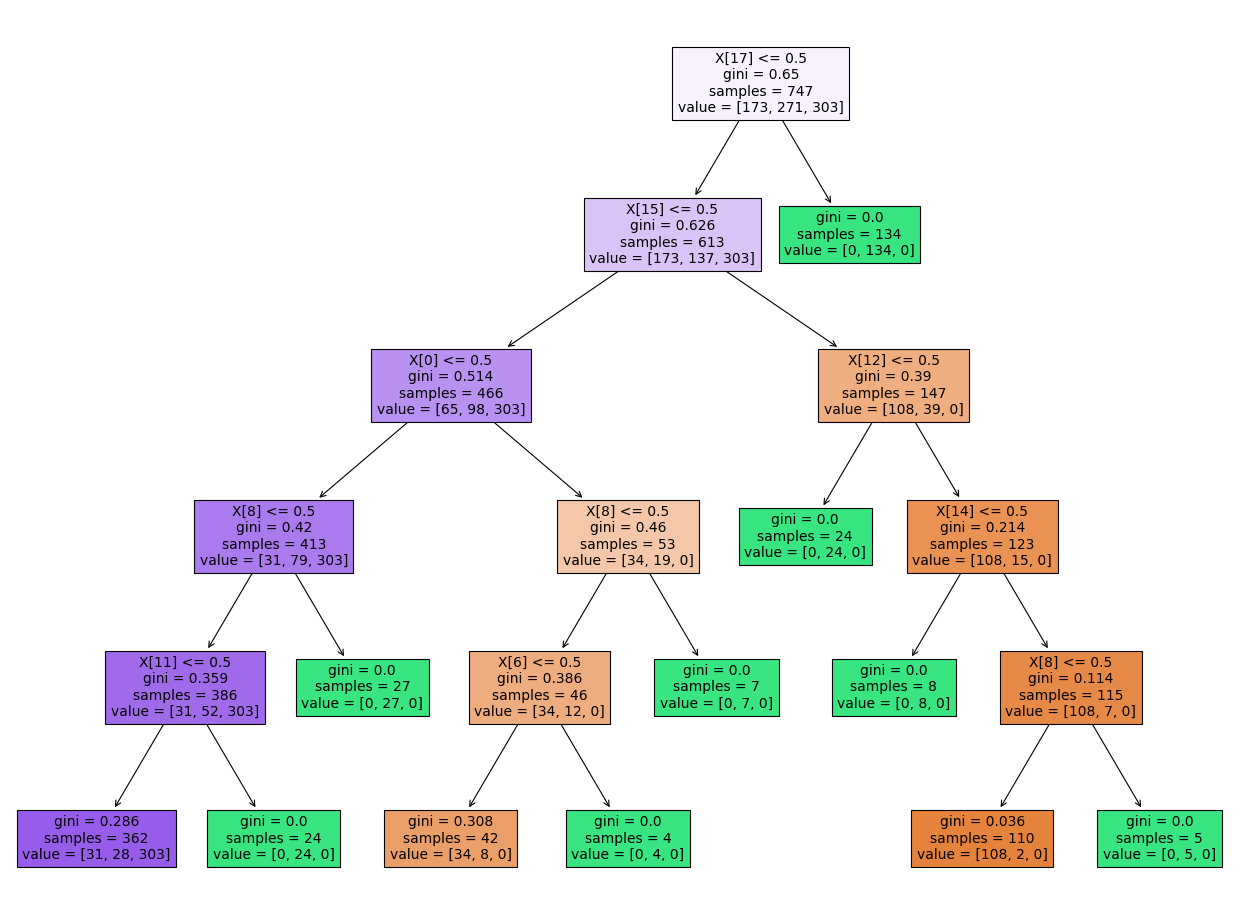

In [41]:
figure(figsize = (20, 15), dpi = 80)

tree.plot_tree(pipeline_dt.named_steps["m"], filled = True)

**Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.**

1. Primero generamos el reporte de clasificación del Decision Tree para ello utilizamos el módulo classification report de Scikit-learn.

In [42]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.76      0.80        74
     class 1       1.00      0.78      0.88       116
     class 2       0.80      1.00      0.89       131

    accuracy                           0.87       321
   macro avg       0.88      0.85      0.86       321
weighted avg       0.88      0.87      0.86       321



2. El resultado del accuracy en este modelo es de 0.86

Ahora hacemos el reporte de clasificación del Random Forest



In [43]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, yhat_rf, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.88      0.87        74
     class 1       1.00      0.91      0.95       116
     class 2       0.92      0.99      0.96       131

    accuracy                           0.93       321
   macro avg       0.93      0.93      0.93       321
weighted avg       0.94      0.93      0.93       321



3. El score de accuracy es de 0.93, para el modelo de Random Forest, lo que indica un mejor performance en comparación al modelo del Decision Tree.

Graficamos la Curva Precision-Recall del Decision Tree

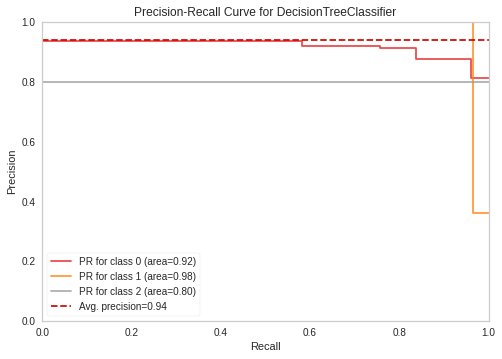

In [44]:
from yellowbrick.classifier import PrecisionRecallCurve
prcurve = PrecisionRecallCurve(
    pipeline_dt,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

4. Obtenemos que el promedio de la precision es de 0.93 para el modelo de Decision Tree

Ahora sacamos la Curva Precision-Recall del modelo con Random Forest

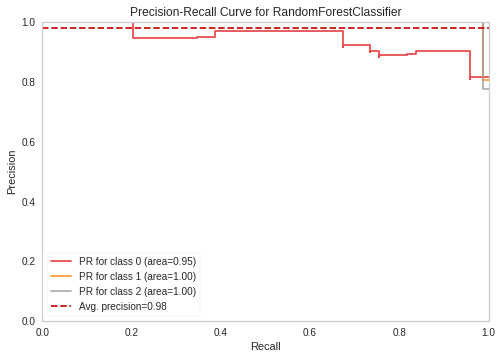

In [123]:
prcurve = PrecisionRecallCurve(
    pipeline_rf,
    per_class=True,
    cmap="Set1"
)
prcurve.fit(X_train, y_train)
prcurve.score(X_test, y_test)
prcurve.show()

5. El promedio de la métrica precision es de 0.98 para el modelo con Decision Tree

**Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.**

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def mi_cm(yreal, ypred,title):
  cm=confusion_matrix(yreal, ypred)

  plt.figure(figsize=(6,4))
  plt.title("Matriz de Confusión "+title)
  ax = sns.heatmap(cm, annot=True, fmt='', cmap="viridis", cbar=True)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

1. Ahora usamos esa función para obtener la matriz de confusión para Decision Tree

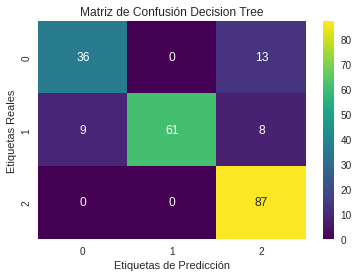

In [125]:
mi_cm(y_test,yhat_dt,"Decision Tree")

2. Hacemos uso de la misma función para obtener la matriz de confusión para Random Forest

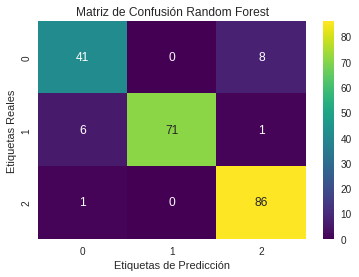

In [126]:
mi_cm(y_test,yhat_rf,"Random Forest")